In [3]:
# 1. Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import plot_tree


In [4]:
# 2. Load the dataset
df = pd.read_csv('drug200.csv')
print(df.head())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY


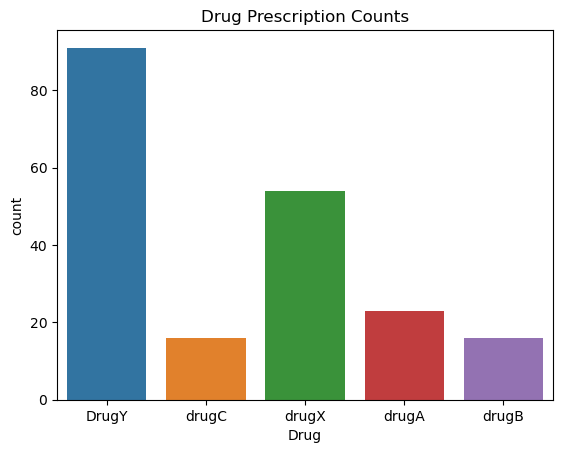

In [5]:
# Plot target class distribution
sns.countplot(x='Drug', data=df)
plt.title('Drug Prescription Counts')
plt.show()


In [6]:
# 3. Encode categorical variables
label_encoders = {}
for col in ['Sex', 'BP', 'Cholesterol', 'Drug']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders in case you want to inverse-transform later


In [7]:
# 4. Split into feature and target variables
X = df.drop('Drug', axis=1)
y = df['Drug']

In [8]:
# 5. Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
print(X_train.shape, X_test.shape)

(140, 5) (60, 5)


In [9]:
# 6. Random Forest Classifier with oob score
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
classifier_rf.fit(X_train, y_train)
print("OOB Score:", classifier_rf.oob_score_)


OOB Score: 0.9571428571428572


In [10]:
# 7. Hyperparameter tuning using GridSearchCV
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50],
    'n_estimators': [10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1,
                           verbose=1,
                           scoring="accuracy")

grid_search.fit(X_train, y_train)
print("Best GridSearch Score:", grid_search.best_score_)


Fitting 4 folds for each of 80 candidates, totalling 320 fits
Best GridSearch Score: 0.95


In [11]:
# 8. Best Estimator
rf_best = grid_search.best_estimator_
print("Best Params:", grid_search.best_params_)

Best Params: {'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 10}


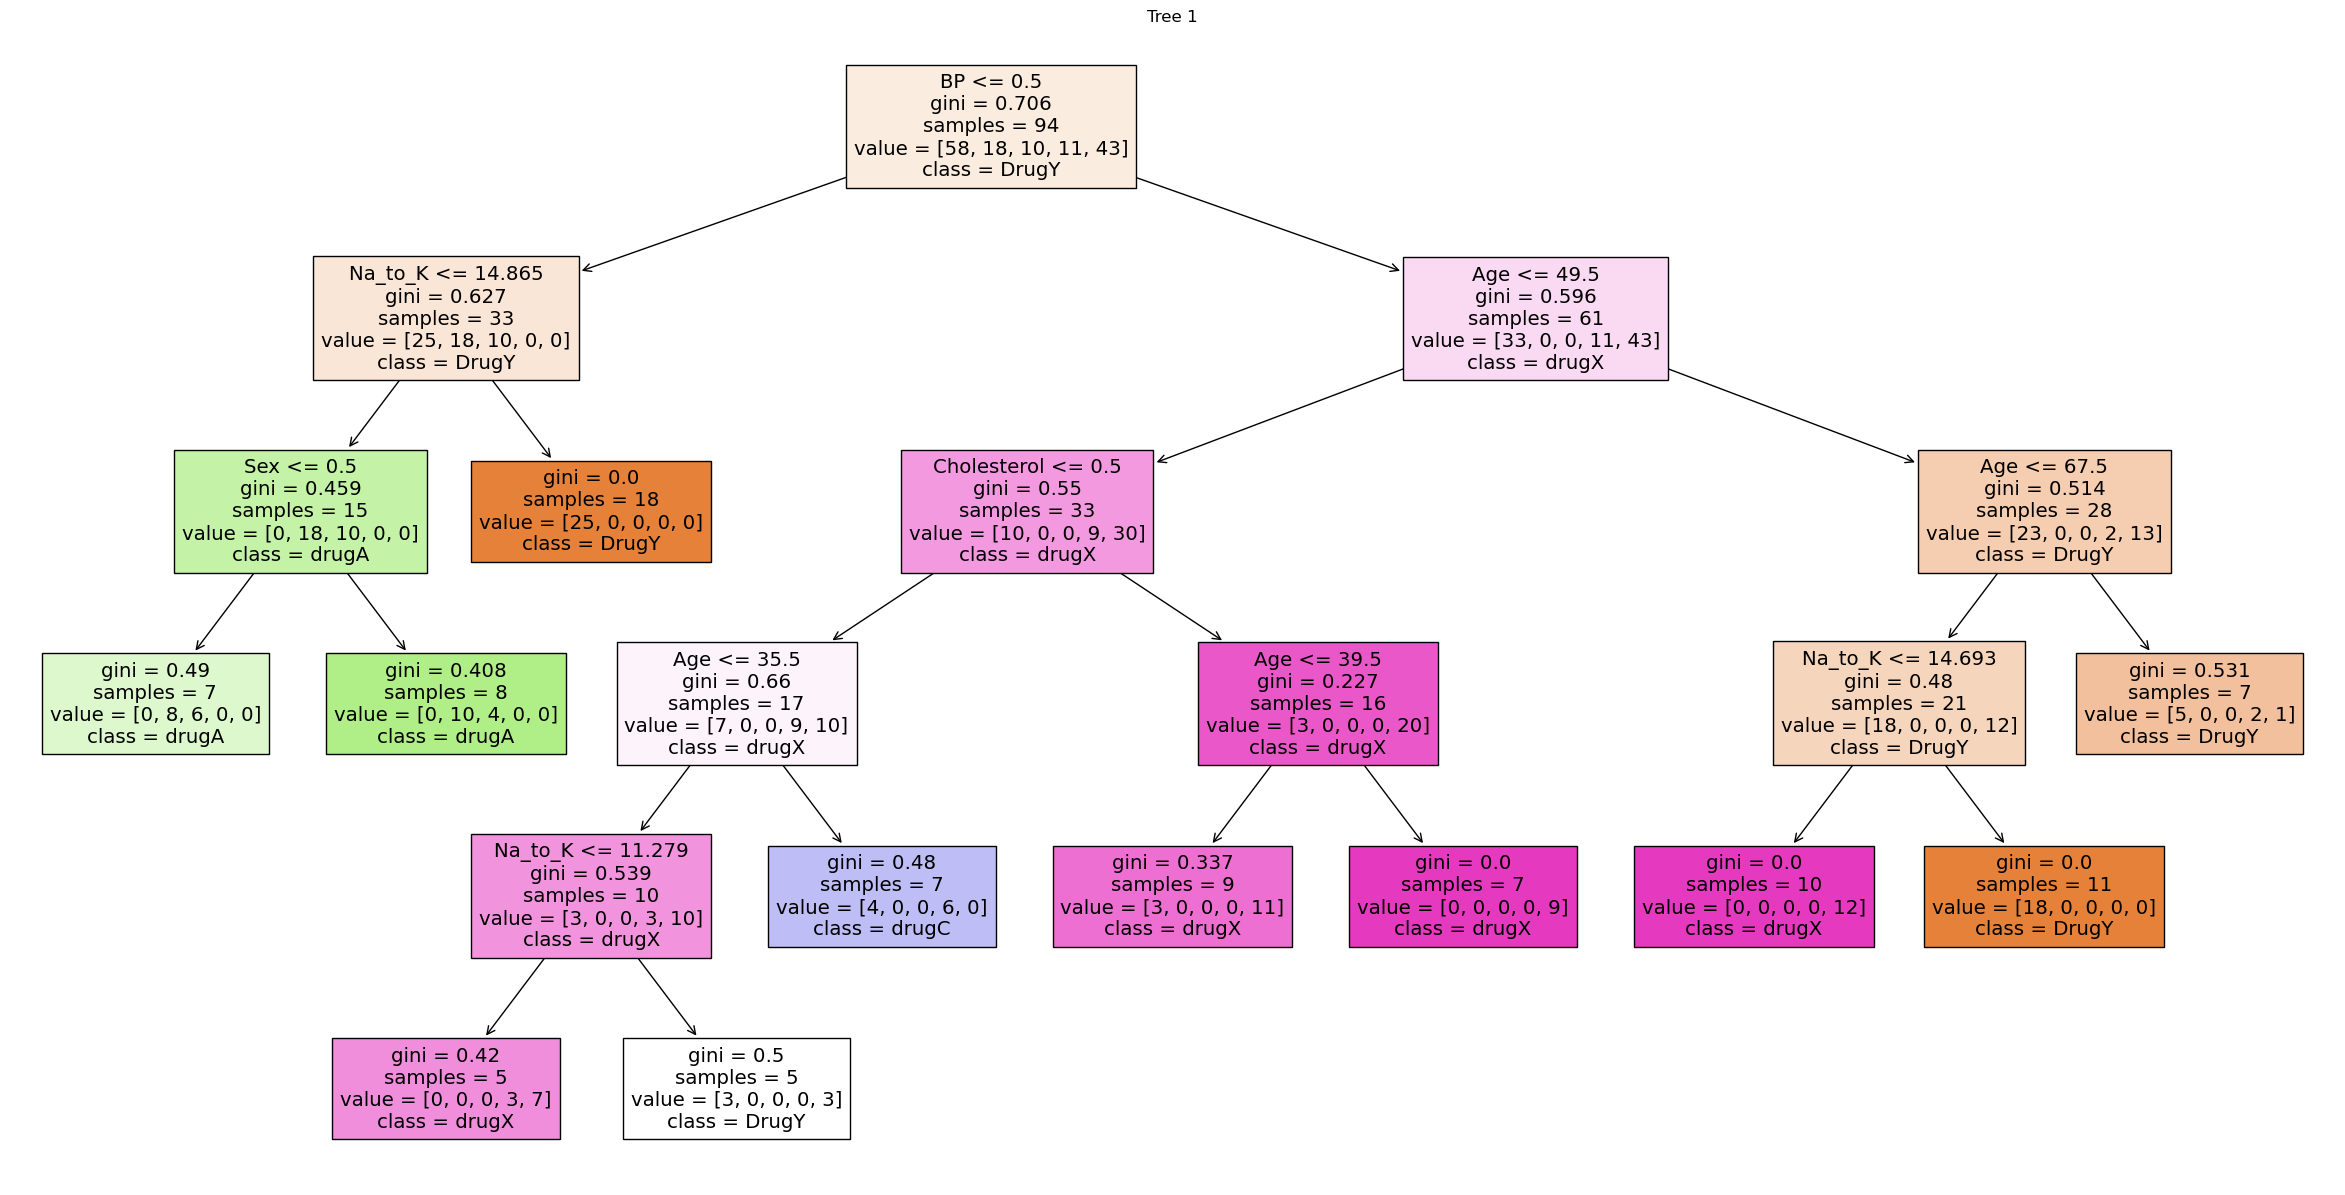

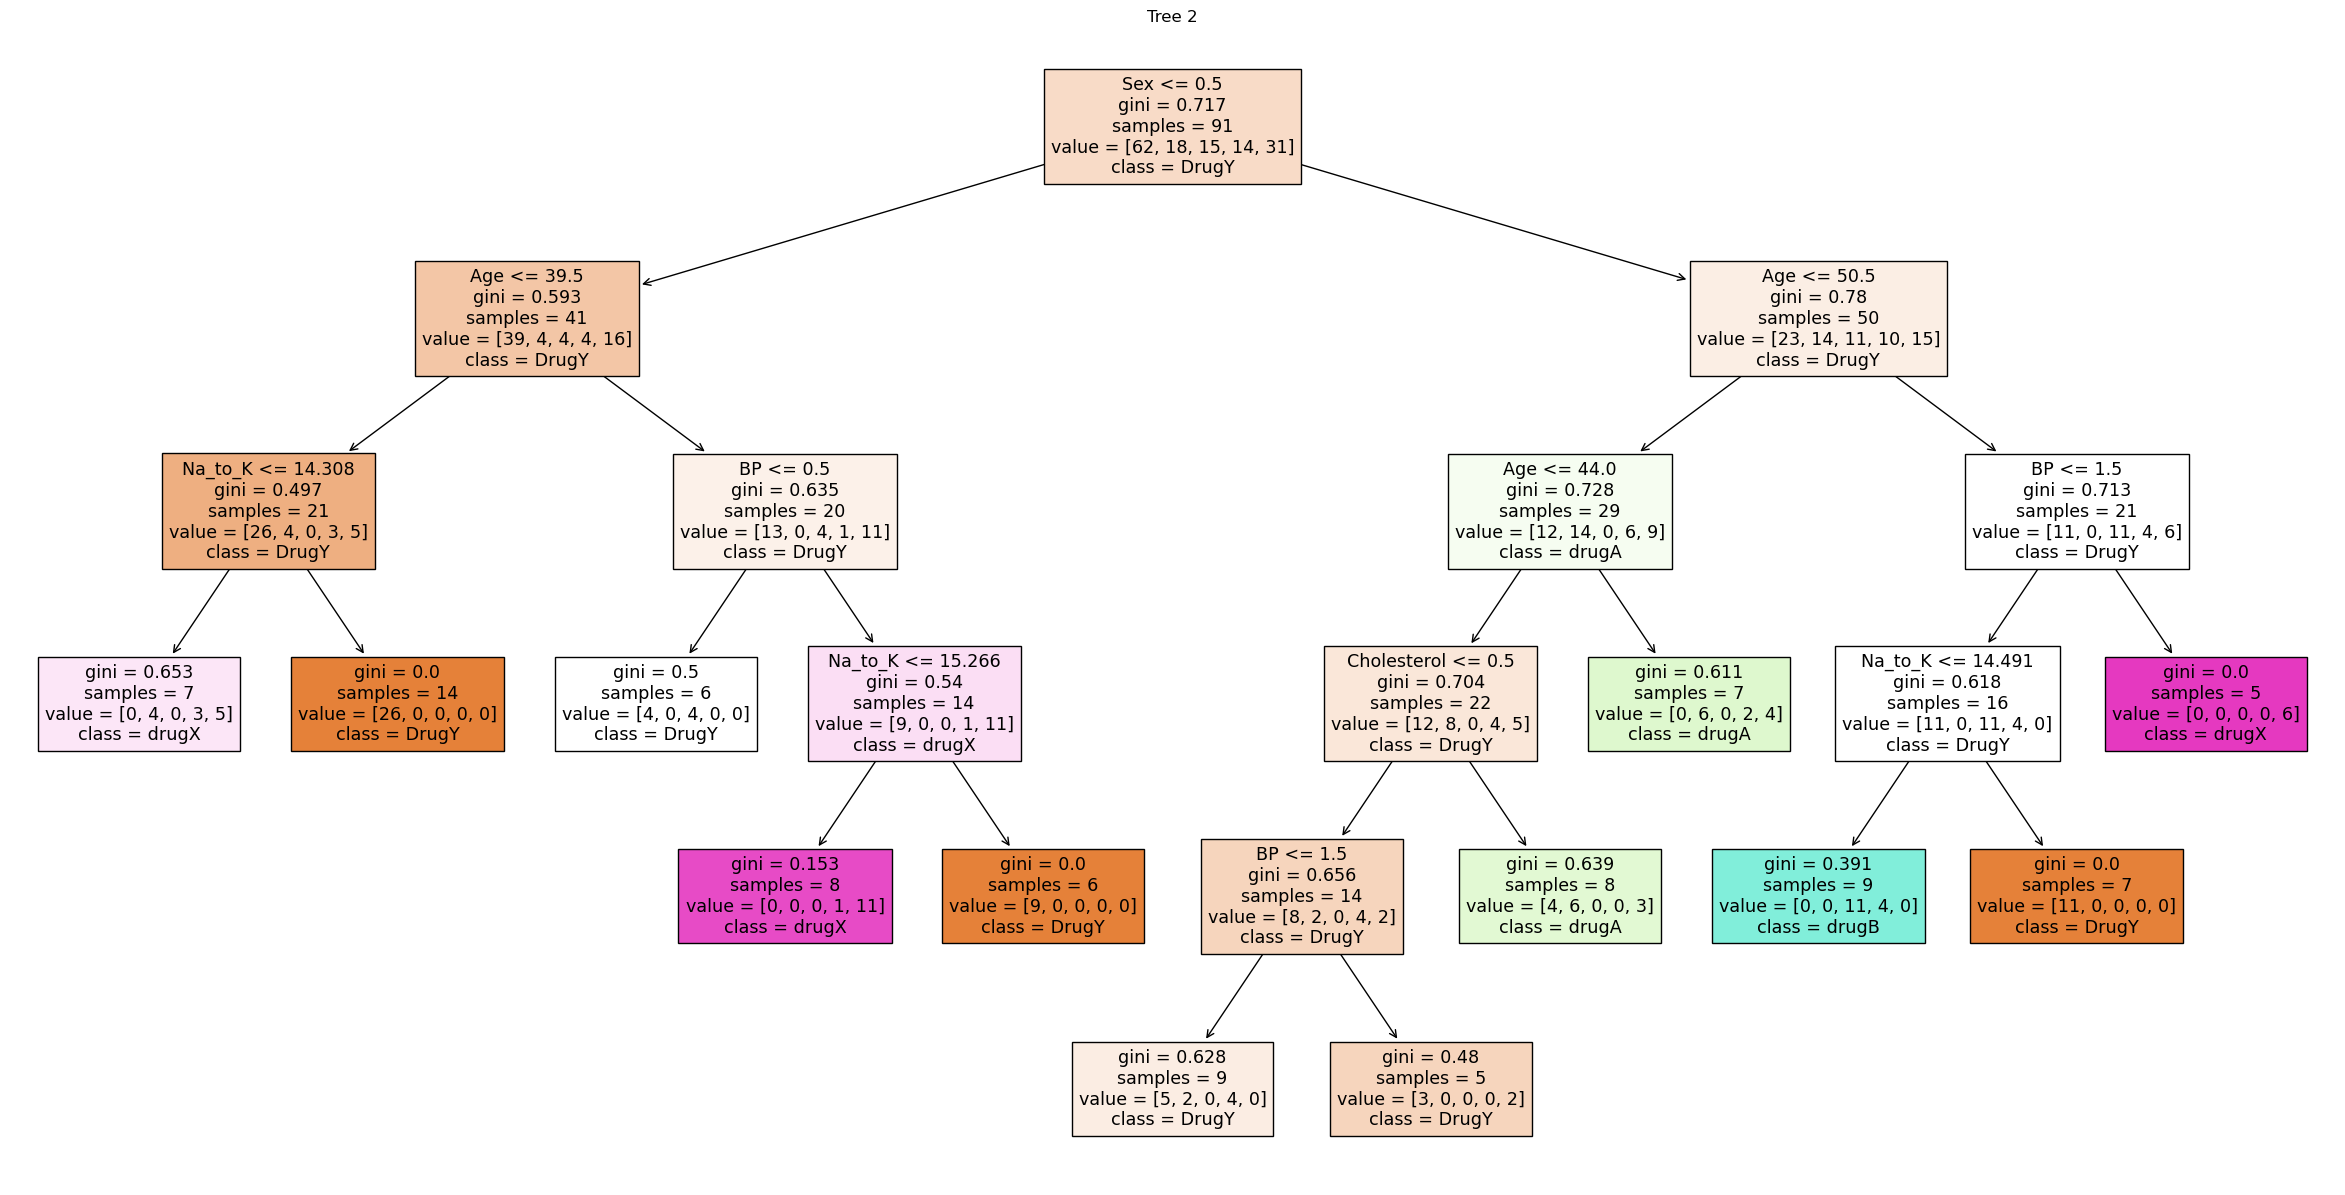

In [13]:
# 9. Visualize individual trees
plt.figure(figsize=(30, 15))
plot_tree(rf_best.estimators_[0], feature_names=X.columns, class_names=label_encoders['Drug'].classes_, filled=True)
plt.title("Tree 1")
plt.show()

plt.figure(figsize=(30, 15))
plot_tree(rf_best.estimators_[1], feature_names=X.columns, class_names=label_encoders['Drug'].classes_, filled=True)
plt.title("Tree 2")
plt.show()

In [14]:
# 10. Feature Importance
importances = rf_best.feature_importances_
imp_df = pd.DataFrame({
    "Varname": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(imp_df)

       Varname  Importance
4      Na_to_K    0.598097
2           BP    0.224269
0          Age    0.139117
3  Cholesterol    0.031414
1          Sex    0.007103
